In [101]:
library(rethinking)
#options(repr.plot.width = 1, repr.plot.height = 0.75)

In [102]:
data(foxes)

In [103]:
Fx <- foxes

In [104]:
Fx$avgfood.s <- (Fx$avgfood - mean(Fx$avgfood))/sd(Fx$avgfood)
Fx$groupsize.s <- (Fx$groupsize - mean(Fx$groupsize))/sd(Fx$groupsize)
Fx$area.s <- (Fx$area - mean(Fx$area))/sd(Fx$area)
Fx$weight.s <- (Fx$weight - mean(Fx$weight))/sd(Fx$weight) #not neccessary for output

In [205]:
mm.area <- scale(Fx$weight.s, center = TRUE, scale = TRUE)
#mm.area[0:3]

In [105]:
head(Fx)

group,avgfood,groupsize,area,weight,avgfood.s,groupsize.s,area.s,weight.s
1,0.37,2,1.09,5.02,-1.924829,-1.524089,-2.239596,0.4141347
1,0.37,2,1.09,2.84,-1.924829,-1.524089,-2.239596,-1.4270464
2,0.53,2,2.05,5.33,-1.118035,-1.524089,-1.205508,0.6759540
2,0.53,2,2.05,6.07,-1.118035,-1.524089,-1.205508,1.3009421
3,0.49,2,2.12,5.85,-1.319734,-1.524089,-1.130106,1.1151348
3,0.49,2,2.12,3.25,-1.319734,-1.524089,-1.130106,-1.0807692


In [106]:
summary(Fx$area.s)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.24000 -0.62380 -0.04216  0.00000  0.64990  2.04800 

In [107]:
#(1)
area.Model <- map( 
    alist( 
        weight ~ dnorm( mu , sigma ),
        mu <- a + b * area.s ,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) ,       
        sigma ~ dunif( 0 , 50 ) ) ,
    data=Fx , start=list( a=mean(Fx$weight) , sigma=sd(Fx$weight) , b=0 ) )

area.seq<-seq(from=min(Fx$area.s) ,to=max(Fx$area.s) ,by=.5)

#Draw parameter samples from posterior. There's variance/uncertainty in mu.
mu <- link( area.Model , data=data.frame(area.s=area.seq) )
#Draw Prediction Simulations from psterior. There's variance/uncertainty in prediction/outcome.
sim.weight <- sim( area.Model , data=data.frame(area.s=area.seq),   n=1e4  )

[ 1000 / 1000 ]
[ 10000 / 10000 ]


In [108]:
HPDI(samples = sim.weight, prob = c(.5, .89, .97))
HPDI(samples = Fx$weight,prob = c(.5, .89, .97) )

|0.97    |0.89     |0.5     0.5|    0.89|    0.97| 
1.953672 2.536216 3.667848 3.602854 2.532872 1.836497

|0.97 |0.89  |0.5  0.5| 0.89| 0.97| 
 1.92  2.78  3.25  4.84  6.31  6.86

In [109]:
mean(Fx$weight)
mean(sim.weight)

[1] 4.529655

[1] 4.522943

In [110]:
area.Model


Maximum a posteriori (MAP) model fit

Formula:
weight ~ dnorm(mu, sigma)
mu <- a + b * area.s
a ~ dnorm(4, 100)
b ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
        a     sigma         b 
4.5296347 1.1786856 0.0230584 

Log-likelihood: -183.67 

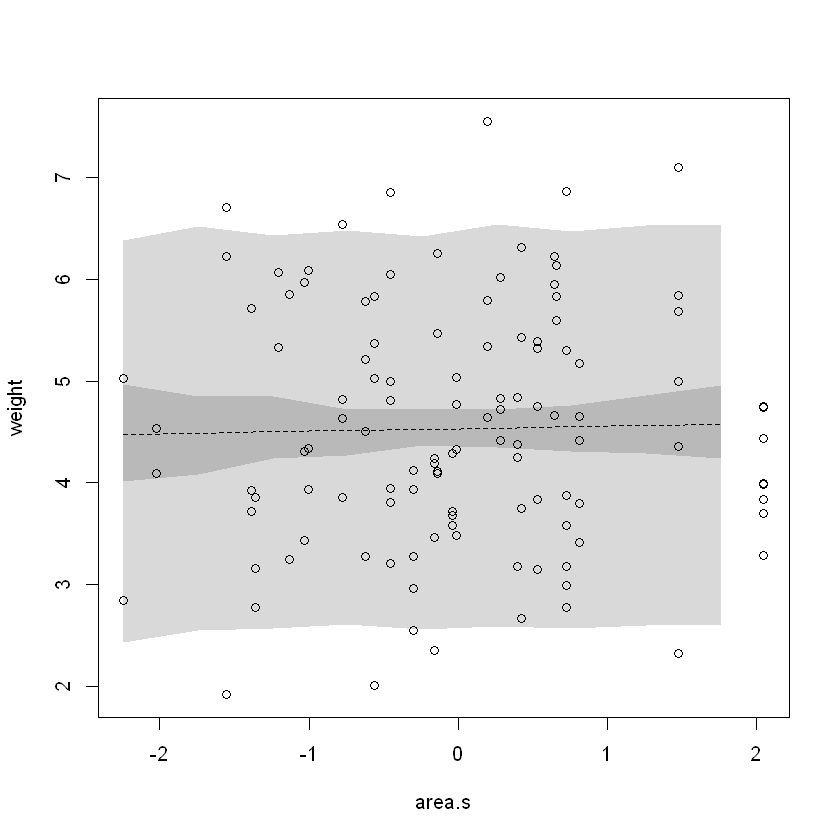

In [111]:
plot(weight~area.s, Fx)
lines(area.seq,apply( mu , 2 , mean ), lty=2)
shade(apply( sim.weight , 2 , HPDI, prob = 0.9 ),area.seq)
shade(apply( mu , 2 , HPDI, prob = 0.9 ),area.seq)

In [112]:
#(2) 
groupsize.Model <- map( 
    alist( 
        weight ~ dnorm( mu , sigma ),
        mu <- a + b*groupsize.s ,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) ,       
        sigma ~ dunif( 0 , 50 ) ) ,
    data=Fx , start=list( a=mean(Fx$weight) , sigma=sd(Fx$weight) , b=0 ) )

size.seq<-seq(from= min(Fx$groupsize.s),to= max(Fx$groupsize.s),by=.5)

#Draw parameter samples from posterior. There's variance/uncertainty in mu.
mu1 <- link( groupsize.Model , data=data.frame(groupsize.s=size.seq) )
#Draw Prediction Simulations from psterior. There's variance/uncertainty in prediction/outcome.
sim.weight1 <- sim( groupsize.Model , data=data.frame(groupsize.s=size.seq),   n=1e4  ) 

[ 1000 / 1000 ]
[ 10000 / 10000 ]


In [113]:
HPDI(samples = sim.weight1, prob = c(.5, .89, .97))
HPDI(samples = Fx$weight,prob = c(.5, .89, .97) )

|0.97    |0.89     |0.5     0.5|    0.89|    0.97| 
2.431558 2.910794 3.851951 3.962254 2.793273 2.308049

|0.97 |0.89  |0.5  0.5| 0.89| 0.97| 
 1.92  2.78  3.25  4.84  6.31  6.86

In [114]:
mean(Fx$weight)
mean(sim.weight1)

[1] 4.529655

[1] 4.484166

In [115]:
groupsize.Model


Maximum a posteriori (MAP) model fit

Formula:
weight ~ dnorm(mu, sigma)
mu <- a + b * groupsize.s
a ~ dnorm(4, 100)
b ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
         a      sigma          b 
 4.5296747  1.1635647 -0.1906151 

Log-likelihood: -182.17 

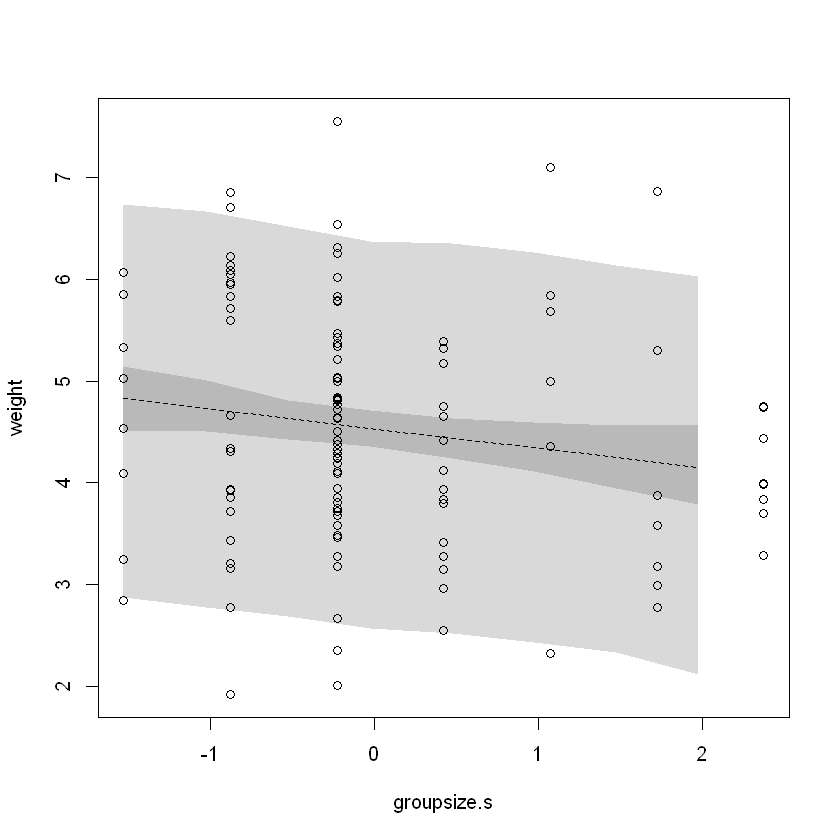

In [116]:
plot(weight~groupsize.s, Fx)
lines(size.seq,apply( mu1 , 2 , mean ), lty=2)
shade(apply( sim.weight1 , 2 , HPDI, prob = 0.9 ),size.seq)
shade(apply( mu1 , 2 , HPDI, prob = 0.9 ),size.seq)

In [117]:
#(1) 
Multi.Model <- map( 
    alist( 
        weight ~ dnorm( mu , sigma ),
        mu <- a + b*area.s +b1*groupsize.s,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) , 
        b1 ~ dnorm( 0 , 10 ) , 
        sigma ~ dunif( 0 , 50 ) ) ,
    data=Fx , start=list( a=mean(Fx$weight) , sigma=sd(Fx$weight) , b=0 ,b1=0) )

In [118]:
Multi.Model


Maximum a posteriori (MAP) model fit

Formula:
weight ~ dnorm(mu, sigma)
mu <- a + b * area.s + b1 * groupsize.s
a ~ dnorm(4, 100)
b ~ dnorm(0, 10)
b1 ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
         a      sigma          b         b1 
 4.5296556  1.1184493  0.5734813 -0.6651597 

Log-likelihood: -177.58 

[ 1000 / 1000 ]
[ 10000 / 10000 ]


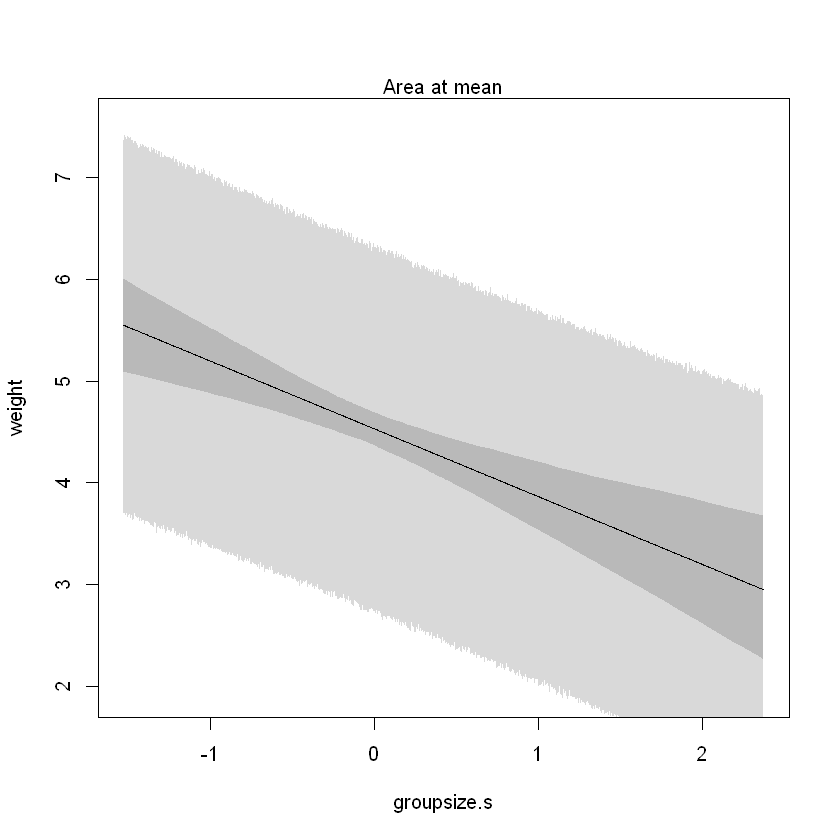

In [119]:
size.seq<-seq(from=min(Fx$groupsize.s),to=max(Fx$groupsize.s), length.out=1e3)
#Draw parameter samples from posterior. There's variance/uncertainty in mu.
mu.multi <- link( Multi.Model , data=data.frame(groupsize.s=size.seq,area.s=mean(Fx$area.s) ) )
#Draw Prediction Simulations from posterior. There's variance/uncertainty in prediction/outcome.
sim.weight.Multi <- sim( Multi.Model , data=data.frame(groupsize.s=size.seq, area.s=mean(Fx$area.s) ),   n=1e4  ) 
#display
plot(weight~groupsize.s, Fx , type="n")
mtext("Area at mean")
lines(size.seq , apply(mu.multi, 2, mean))
shade(apply( mu.multi , 2, PI) , size.seq  )
shade(apply( sim.weight.Multi , 2, PI) , size.seq  )

[ 1000 / 1000 ]
[ 10000 / 10000 ]


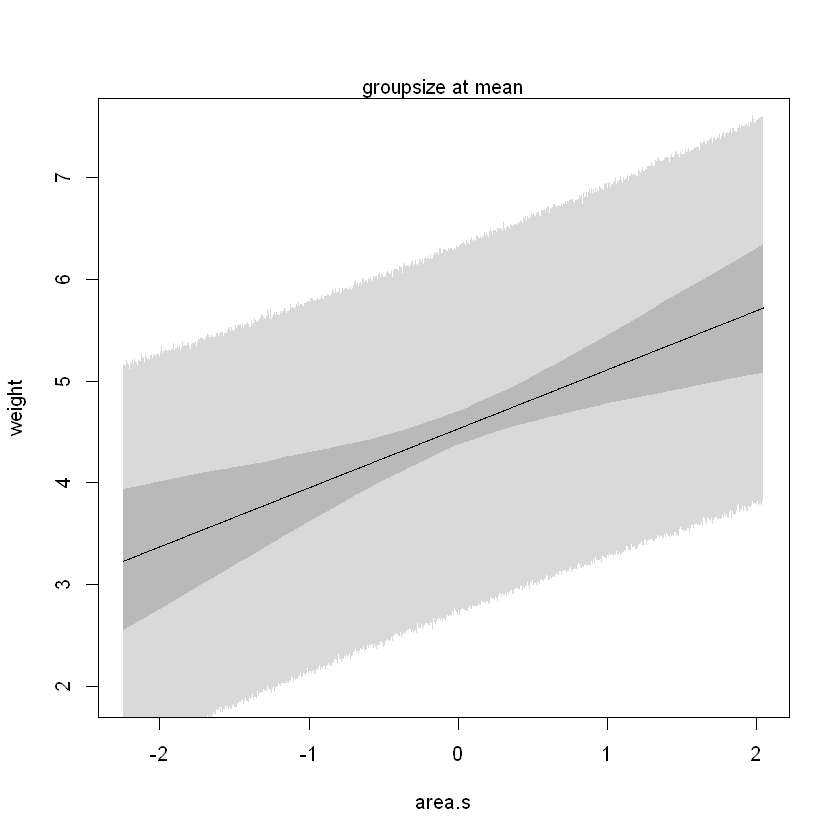

In [120]:
area.seq<-seq(from=min(Fx$area.s),to=max(Fx$area.s), length.out=1e3)
#Draw parameter samples from posterior. There's variance/uncertainty in mu.
mu.multi2 <- link( Multi.Model , data=data.frame(groupsize.s=mean(Fx$groupsize.s),area.s=area.seq ) )
#Draw Prediction Simulations from psterior. There's variance/uncertainty in prediction/outcome.
sim.weight.Multi2 <- sim( Multi.Model , data=data.frame(groupsize.s=mean(Fx$groupsize.s), area.s=area.seq ),   n=1e4  ) 


Multi2.pi <- apply(sim.weight.Multi2 , 2 , PI)
#display
plot(weight~area.s, Fx , type="n")
mtext("groupsize at mean")
lines(area.seq , apply(mu.multi2, 2, mean))
shade(apply( mu.multi2 , 2, PI) , area.seq  )
shade(apply( sim.weight.Multi2 , 2, PI) , area.seq  )

In [121]:
Var.Model <- map( 
    alist( 
        area.s ~ dnorm( mu , sigma ),
        mu <- a + b*groupsize.s,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) ,  
        sigma ~ dunif( 0 , 50 ) ) ,
    data=Fx , start=list( a=mean(Fx$area.s) , sigma=sd(Fx$area.s) , b=0 ) )

In [122]:
mu.v <- coef(Var.Model)['a'] + coef(Var.Model)['b']*Fx$groupsize.s
Area.residuals <- Fx$area.s - mu.v

In [123]:
# Need this in order to create interval around mu
mx <- map( 
    alist( 
        weight ~ dnorm( mu , sigma ),
        mu <- a + b*Area.residuals,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) ,  
        sigma ~ dunif( 0 , 50 ) ) ,
    data=data.frame(weight=Fx$weight,Area.residuals=Area.residuals) )

[ 1000 / 1000 ]


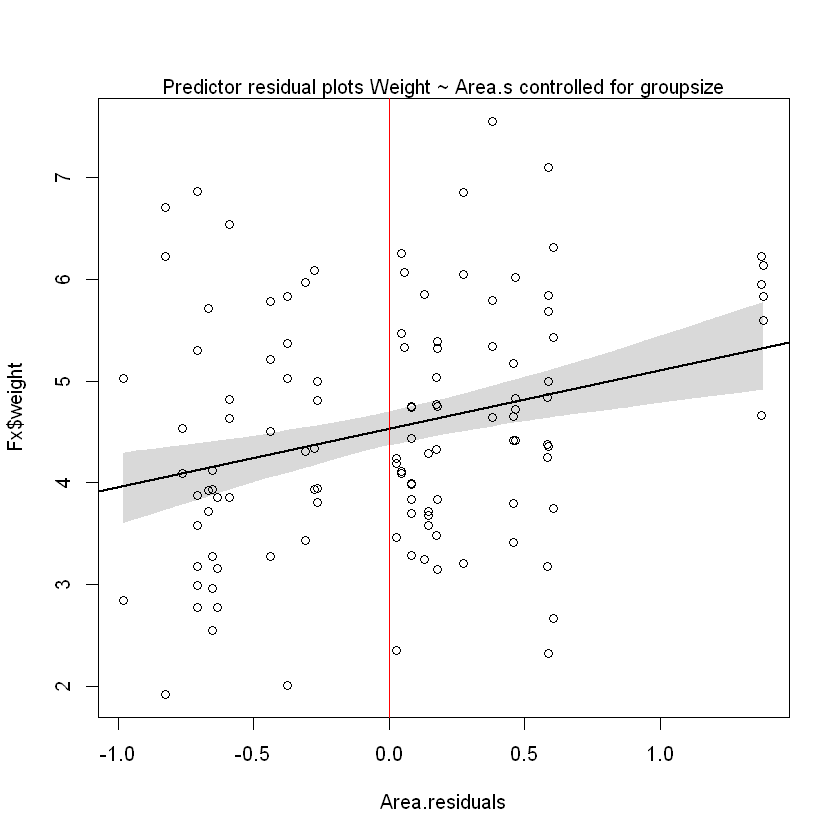

In [124]:
Area.resid.seq<-seq(from=min(Area.residuals),to=max(Area.residuals), length.out=1e3)
plot(Fx$weight~Area.residuals )
mtext("Predictor residual plots Weight ~ Area.s controlled for groupsize")
abline(lm(Fx$weight~Area.residuals ), lwd=2)
mu.varz <- link( mx , data=data.frame(Area.residuals=Area.resid.seq ) )
shade(apply( mu.varz , 2, PI) , Area.resid.seq  )
abline(v=0, col= "red")

In [125]:
Var.Model2 <- map( 
    alist( 
        groupsize.s ~ dnorm( mu , sigma ),
        mu <- a + b*area.s,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) ,  
        sigma ~ dunif( 0 , 50 ) ) ,
    data=Fx , start=list( a=mean(Fx$groupsize.s) , sigma=sd(Fx$groupsize.s) , b=0 ) )

In [126]:
mu.v2 <- coef(Var.Model2)['a'] + coef(Var.Model2)['b']*Fx$area.s
groupsize.residuals <- Fx$groupsize.s - mu.v2

In [127]:
# Need this in order to create interval around mu
mx2 <- map( 
    alist( 
        weight ~ dnorm( mu , sigma ),
        mu <- a + b*groupsize.residuals,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) ,  
        sigma ~ dunif( 0 , 50 ) ) ,
    data=data.frame(weight=Fx$weight,groupsize.residuals=groupsize.residuals) )

[ 1000 / 1000 ]


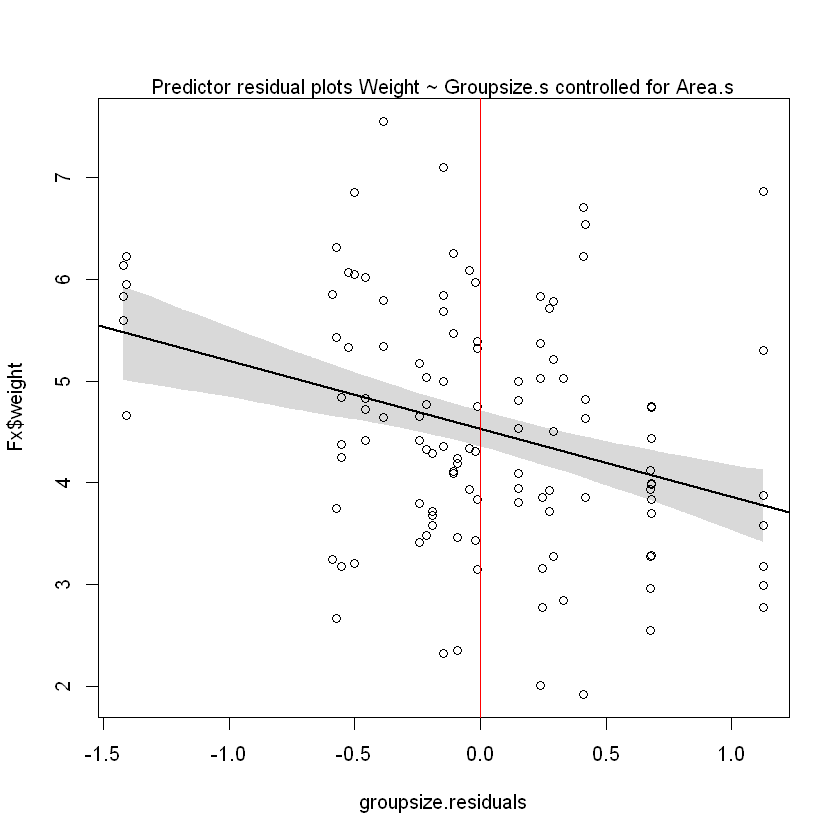

In [128]:
groupsize.residuals.seq<-seq(from=min(groupsize.residuals),to=max(groupsize.residuals), length.out=1e3)
plot(Fx$weight~groupsize.residuals )
mtext("Predictor residual plots Weight ~ Groupsize.s controlled for Area.s")
abline(lm(Fx$weight~groupsize.residuals ), lwd=2)
mu.varz2 <- link( mx2 , data=data.frame(groupsize.residuals=groupsize.residuals.seq ) )
shade(apply( mu.varz2 , 2, PI) , groupsize.residuals.seq  )
abline(v=0, col= "red")

In [129]:
#draw parameter samples from posterior using trained data
mu.fromsource <- link(Multi.Model)

#summarize samples across cases
mu.mean <- apply( mu.fromsource, 2 , mean)
mu.PI <- apply(mu.fromsource, 2, PI)

#predict/simulate observations
weight.sim3 <- sim(Multi.Model, n= 1e4)
weight.PI3 <-apply(weight.sim3, 2, PI)

[ 1000 / 1000 ]
[ 10000 / 10000 ]


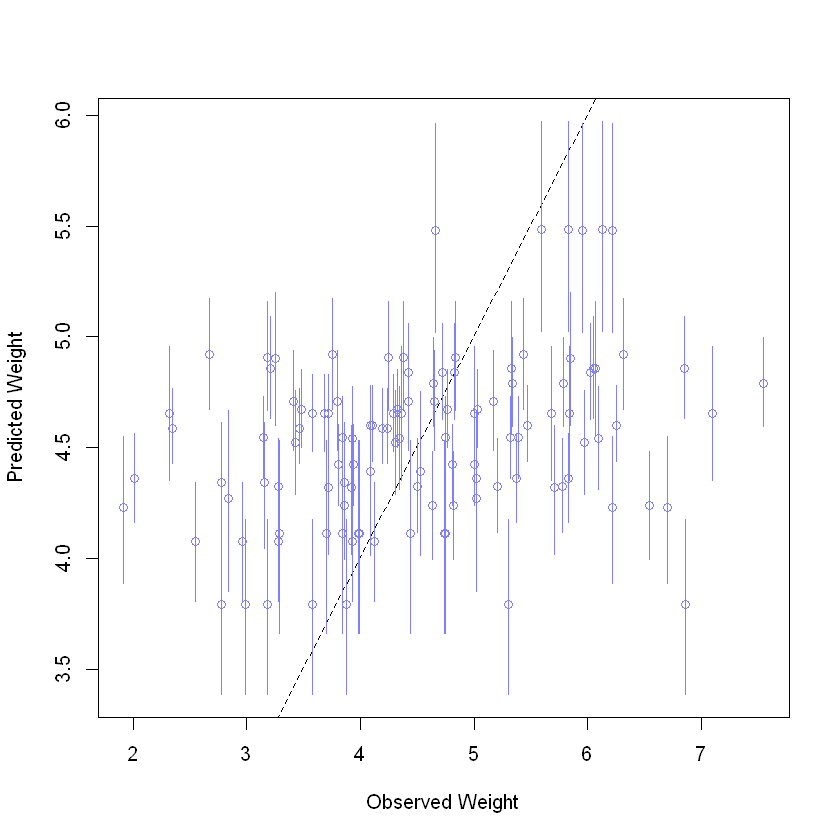

In [130]:
plot( mu.mean ~ Fx$weight , col=rangi2 , ylim=range(mu.PI) , xlab="Observed Weight" , ylab="Predicted Weight" )
abline( a=0 , b=1 , lty=2 )
for ( i in 1:nrow(Fx) ) 
    lines( rep(Fx$weight[i],2) , c(mu.PI[1,i],mu.PI[2,i]) ,
          col=rangi2 )
# doesnt work in jupyter identify(x=Fx$weight, y=mu.mean , labels = Fx$weight , cex = 0.8)

[ 1000 / 1000 ]


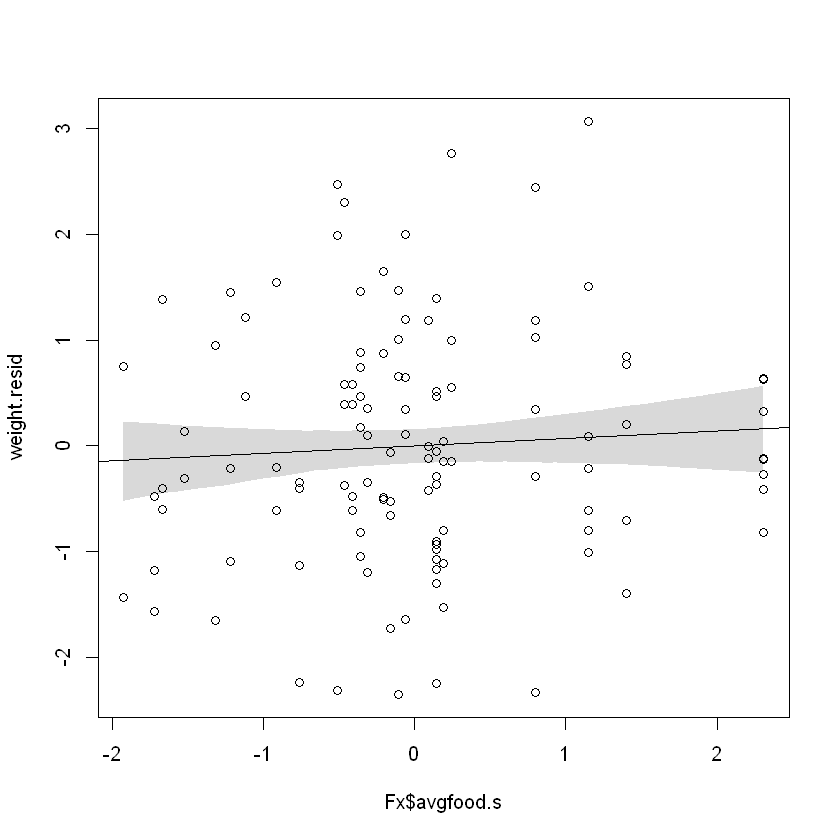

In [132]:
# compute residuals 
weight.resid <- Fx$weight - mu.mean

newvar<-map( 
    alist( 
        weigh.resid ~ dnorm( mu , sigma ),
        mu <- a + b*avgfood,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) ,  
        sigma ~ dunif( 0 , 50 ) ) ,
    data=data.frame(weigh.resid = weight.resid, avgfood=Fx$avgfood.s) )
plot( weight.resid ~ Fx$avgfood.s)
abline(lm( weight.resid ~ Fx$avgfood.s) )
newx<- seq(from=min(Fx$avgfood.s),to=max(Fx$avgfood.s), length.out=1e3)
mu.mu <-link(newvar, data=data.frame(avgfood=newx ))
shade(apply( mu.mu , 2, PI), newx)
#lines(Fx$avgfood.s,prd[,3],col="red",lty=2)

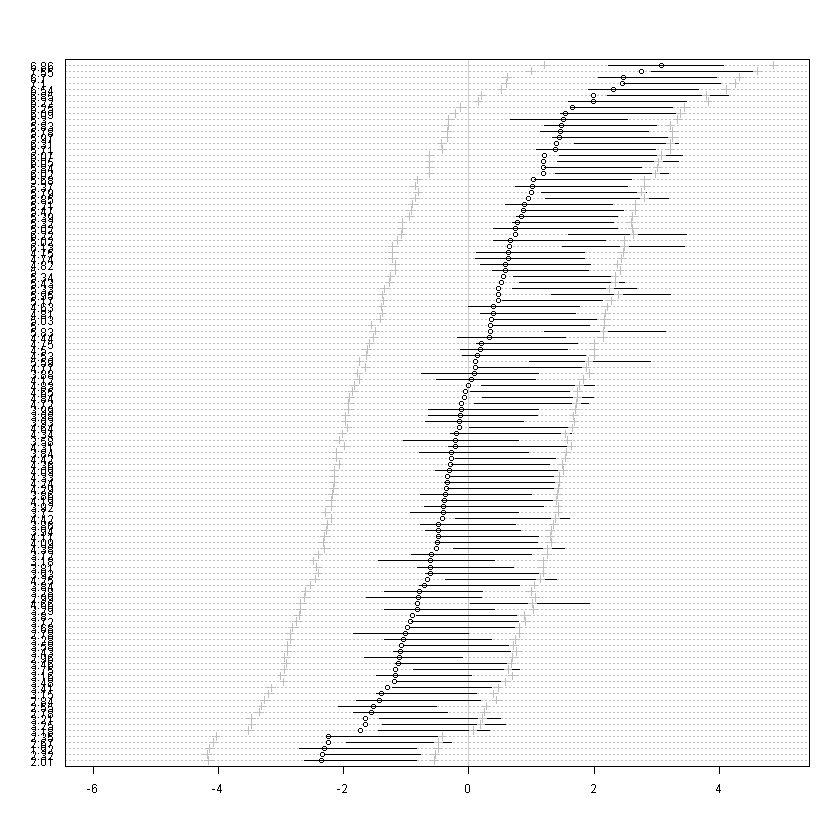

In [206]:
# get ordering by divorce rate 
o <- order(weight.resid) 
# make the plot 
dotchart( weight.resid[o] , labels=Fx$weight[o] , xlim=c(-6,5) , cex=0.6 )
abline( v=0 , col=col.alpha("black",0.2) )
for ( i in 1:nrow(Fx) ) { j <- o[i] 
# which State in order 
lines( Fx$weight[j]-c(mu.PI[1,j],mu.PI[2,j]) , rep(i,2) ) 
points( Fx$weight[j]-c(weight.PI3[1,j],weight.PI3[2,j]) , rep(i,2), pch=3 , cex=0.6 , col="gray" ) }


In [207]:
cor(Fx)

,group,avgfood,groupsize,area,weight,avgfood.s,groupsize.s,area.s,weight.s
group,1.0000000,0.34084493,0.4009594,0.37777286,-0.15190033,0.34084493,0.4009594,0.37777286,-0.15190033
avgfood,0.3408449,1.00000000,0.9014829,0.88310378,-0.02503892,1.00000000,0.9014829,0.88310378,-0.02503892
groupsize,0.4009594,0.90148290,1.0000000,0.82759448,-0.16099376,0.90148290,1.0000000,0.82759448,-0.16099376
area,0.3777729,0.88310378,0.8275945,1.00000000,0.01947728,0.88310378,0.8275945,1.00000000,0.01947728
weight,-0.1519003,-0.02503892,-0.1609938,0.01947728,1.00000000,-0.02503892,-0.1609938,0.01947728,1.00000000
avgfood.s,0.3408449,1.00000000,0.9014829,0.88310378,-0.02503892,1.00000000,0.9014829,0.88310378,-0.02503892
groupsize.s,0.4009594,0.90148290,1.0000000,0.82759448,-0.16099376,0.90148290,1.0000000,0.82759448,-0.16099376
area.s,0.3777729,0.88310378,0.8275945,1.00000000,0.01947728,0.88310378,0.8275945,1.00000000,0.01947728
weight.s,-0.1519003,-0.02503892,-0.1609938,0.01947728,1.00000000,-0.02503892,-0.1609938,0.01947728,1.00000000


In [208]:
#bodyweight as an additive function of avgfood and groupsize, and
MM.5.7 <- map( 
    alist( 
        weight ~ dnorm( mu , sigma ),
        mu <- a + b*avgfood.s +b1*groupsize.s,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) , 
        b1 ~ dnorm( 0 , 10 ) , 
        sigma ~ dunif( 0 , 50 ) ) ,
    data=Fx , start=list( a=mean(Fx$weight) , sigma=sd(Fx$weight) , b=0 ,b1=0) )

In [209]:
MM.5.7


Maximum a posteriori (MAP) model fit

Formula:
weight ~ dnorm(mu, sigma)
mu <- a + b * avgfood.s + b1 * groupsize.s
a ~ dnorm(4, 100)
b ~ dnorm(0, 10)
b1 ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
         a      sigma          b         b1 
 4.5296547  1.1166010  0.7581707 -0.8740034 

Log-likelihood: -177.39 

[ 1000 / 1000 ]
[ 10000 / 10000 ]


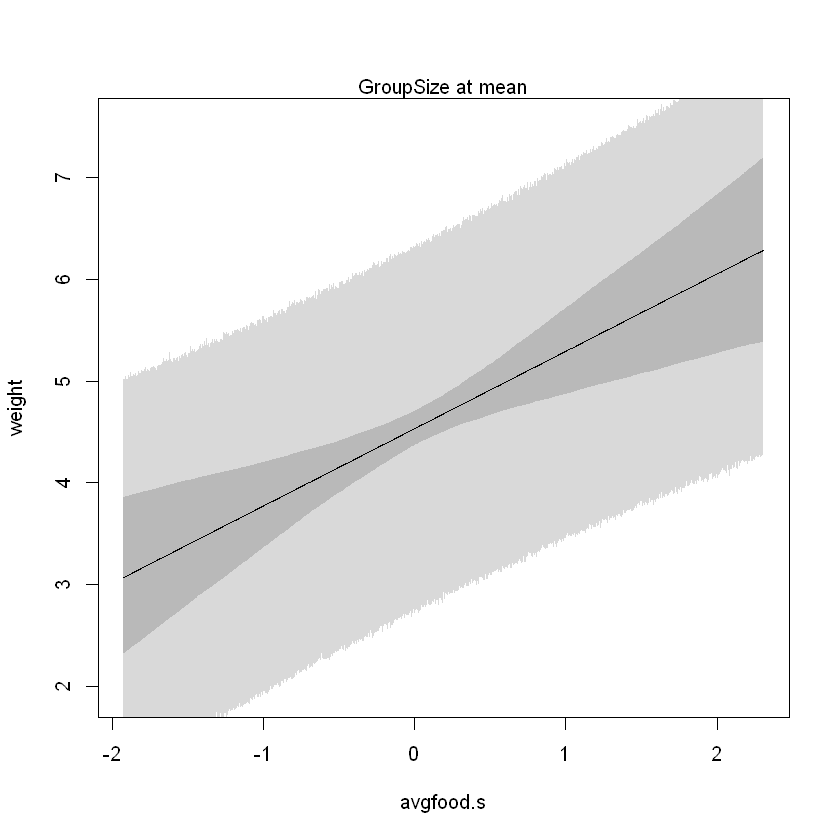

In [210]:
avgfood.seq<-seq(from=min(Fx$avgfood.s),to=max(Fx$avgfood.s), length.out=1e3)
#Draw parameter samples from posterior. There's variance/uncertainty in mu.
mu.multi.5.7 <- link( MM.5.7 , data=data.frame(avgfood.s=avgfood.seq ,groupsize.s=mean(Fx$groupsize.s) ) )
#Draw Prediction Simulations from posterior. There's variance/uncertainty in prediction/outcome.
sim.weight.Multi.5.7 <- sim( MM.5.7 , data=data.frame(avgfood.s=avgfood.seq ,groupsize.s=mean(Fx$groupsize.s)),n=1e4  ) 
#display
plot(weight ~ avgfood.s , Fx , type="n")
mtext("GroupSize at mean")
lines(avgfood.seq , apply(mu.multi.5.7, 2, mean))
shade(apply( mu.multi.5.7 , 2, PI) , avgfood.seq  )
shade(apply( sim.weight.Multi.5.7 , 2, PI) , avgfood.seq  )

In [211]:
#bodyweight as an additive function of avgfood and groupsize, and
MM.5.7.2 <- map( 
    alist( 
        weight ~ dnorm( mu , sigma ),
        mu <- a + b*avgfood.s +b1*groupsize.s + b2*area.s,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) , 
        b1 ~ dnorm( 0 , 10 ) , 
        b2 ~ dnorm( 0 , 10 ) , 
        sigma ~ dunif( 0 , 50 ) ) ,
    data=Fx , start=list( a=mean(Fx$weight) , sigma=sd(Fx$weight) , b=0 ,b1=0) )

In [212]:
MM.5.7.2


Maximum a posteriori (MAP) model fit

Formula:
weight ~ dnorm(mu, sigma)
mu <- a + b * avgfood.s + b1 * groupsize.s + b2 * area.s
a ~ dnorm(4, 100)
b ~ dnorm(0, 10)
b1 ~ dnorm(0, 10)
b2 ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
         a      sigma          b         b1         b2 
 4.5296545  1.1043480  0.4968572 -0.9341997  0.3573854 

Log-likelihood: -176.11 

[ 1000 / 1000 ]
[ 10000 / 10000 ]


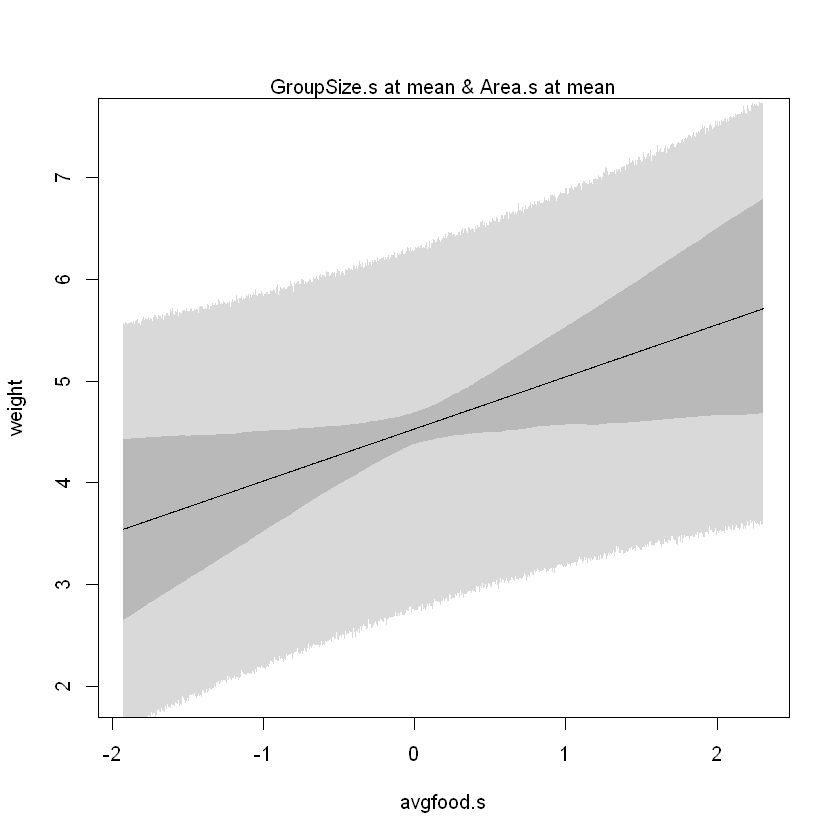

In [213]:
avgfood.seq<-seq(from=min(Fx$avgfood.s),to=max(Fx$avgfood.s), length.out=1e3)
#Draw parameter samples from posterior. There's variance/uncertainty in mu.
mu.multi.5.7.2 <- link( MM.5.7.2 , data=data.frame(avgfood.s=avgfood.seq ,groupsize.s=mean(Fx$groupsize.s),
                                                  area.s = mean(Fx$area.s)) )
#Draw Prediction Simulations from posterior. There's variance/uncertainty in prediction/outcome.
sim.weight.Multi.5.7.2 <- sim( MM.5.7.2 , data=data.frame(avgfood.s=avgfood.seq ,
                                                          groupsize.s=mean(Fx$groupsize.s),
                                                         area.s=mean(Fx$area.s)),n=1e4  ) 
#display
plot(weight ~ avgfood.s , Fx , type="n")
mtext("GroupSize.s at mean & Area.s at mean")
lines(avgfood.seq , apply(mu.multi.5.7.2, 2, mean))
shade(apply( mu.multi.5.7.2 , 2, PI) , avgfood.seq  )
shade(apply( sim.weight.Multi.5.7.2 , 2, PI) , avgfood.seq  )

In [141]:
#draw parameter samples from posterior using trained data
mu.from.source <- link(MM.5.7.2)

#summarize samples across cases
mu.mean <- apply( mu.from.source, 2 , mean)
mu.PI <- apply(mu.from.source, 2, PI)

#predict/simulate observations
weight.sim4 <- sim(MM.5.7.2, n= 1e4)
weight.PI4 <-apply(weight.sim4, 2, PI)

[ 1000 / 1000 ]
[ 10000 / 10000 ]


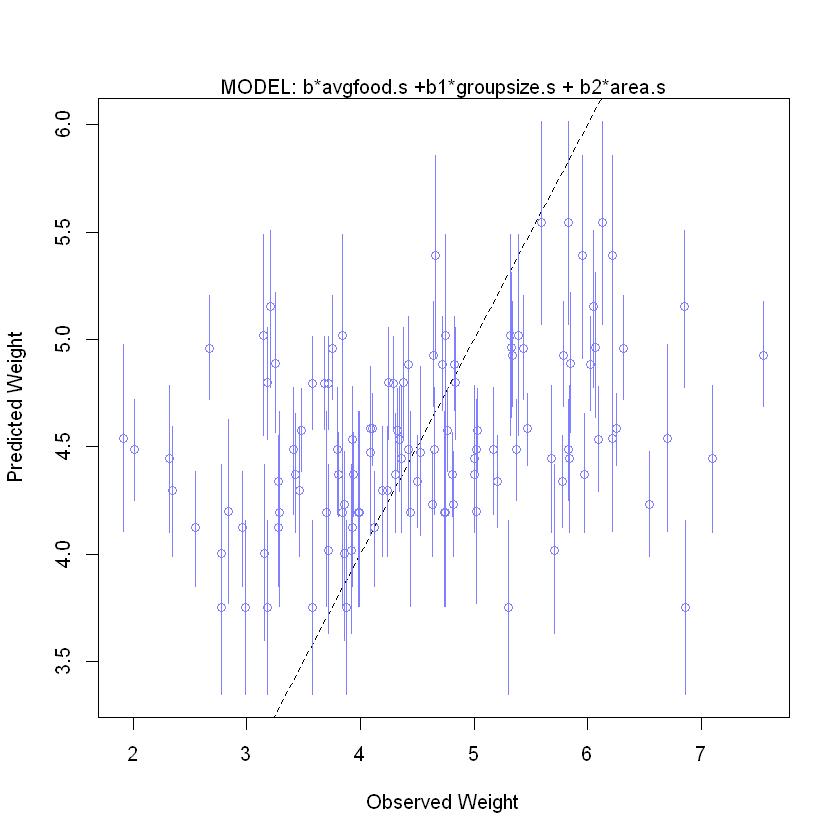

In [142]:
plot( mu.mean ~ Fx$weight , col=rangi2 , ylim=range(mu.PI) , xlab="Observed Weight" , ylab="Predicted Weight" )
abline( a=0 , b=1 , lty=2 )
mtext("MODEL: b*avgfood.s +b1*groupsize.s + b2*area.s")
for ( i in 1:nrow(Fx) ) 
    lines( rep(Fx$weight[i],2) , c(mu.PI[1,i],mu.PI[2,i]) ,
          col=rangi2 )

In [143]:
MM.5.7


Maximum a posteriori (MAP) model fit

Formula:
weight ~ dnorm(mu, sigma)
mu <- a + b * avgfood.s + b1 * groupsize.s
a ~ dnorm(4, 100)
b ~ dnorm(0, 10)
b1 ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
         a      sigma          b         b1 
 4.5296547  1.1166010  0.7581707 -0.8740034 

Log-likelihood: -177.39 

[ 1000 / 1000 ]
[ 10000 / 10000 ]


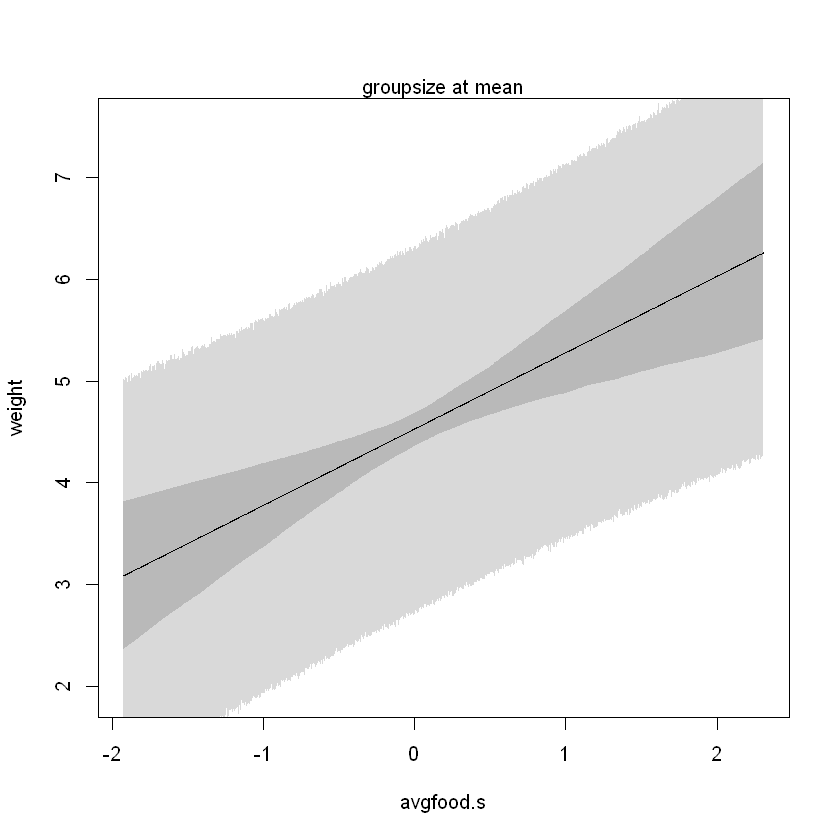

In [144]:
avgfood.seq<-seq(from=min(Fx$avgfood.s),to=max(Fx$avgfood.s), length.out=1e3)
#Draw parameter samples from posterior. There's variance/uncertainty in mu.
mu.multi2.AGEFOOD <- link( MM.5.7 , data=data.frame(avgfood.s=avgfood.seq , groupsize.s=mean(Fx$groupsize.s)) )
#Draw Prediction Simulations from psterior. There's variance/uncertainty in prediction/outcome.
sim.weight.Multi.AGEFOOD <- sim( MM.5.7 ,
                                data=data.frame(groupsize.s=mean(Fx$groupsize.s), avgfood.s=avgfood.seq ),
                                n=1e4 )

Multi2.pi.AGEFOOD <- apply(sim.weight.Multi.AGEFOOD , 2 , PI)
#display
plot(weight~avgfood.s, Fx , type="n")
mtext("groupsize at mean")
lines(avgfood.seq , apply(mu.multi2.AGEFOOD, 2, mean))
shade(apply( mu.multi2.AGEFOOD , 2, PI) , avgfood.seq  )
shade(apply( sim.weight.Multi.AGEFOOD , 2, PI) , avgfood.seq  )

In [145]:
#draw parameter samples from posterior using trained data
mu.from.source2 <- link(MM.5.7)

#summarize samples across cases
mu.mean2 <- apply( mu.from.source2, 2 , mean)
mu.PI2 <- apply(mu.from.source2, 2, PI)

#predict/simulate observations
weight.sim42 <- sim(MM.5.7, n= 1e4)
weight.PI42 <-apply(weight.sim42, 2, PI)

[ 1000 / 1000 ]
[ 10000 / 10000 ]


In [214]:
#foodavg_AND_group_size
weight.MEAN42 <-apply(weight.sim42, 2, mean)
#weight.MEAN42

In [215]:
#foodavg_AND_group_size_AND_area
weight.MEAN43 <-apply(weight.sim4, 2, mean)
#weight.MEAN43

In [149]:
sum(abs(Fx$weight - weight.MEAN42))/length(Fx$weight)

[1] 0.8774028

In [150]:
sum(abs(Fx$weight - weight.MEAN43))/length(Fx$weight)

[1] 0.8605324

In [228]:
sum((Fx$weight - weight.MEAN43)**2)/length(Fx$weight)

[1] 1.215722

In [234]:
r.sq <-sum((Fx$weight - weight.MEAN42)**2) / sum((Fx$weight - mean(Fx$weight))**2) # Rsquared
r.sq 

[1] 0.8960279

In [235]:
1-(1-r.sq)*((length(Fx$weight)-1)/(length(Fx$weight)-5-1))

[1] 0.8913019

In [152]:
sum((Fx$weight - weight.MEAN42)**2)/length(Fx$weight)

[1] 1.245321

In [153]:
sum(abs(Fx$weight - weight.MEAN43))/length(Fx$weight)

[1] 0.8605324

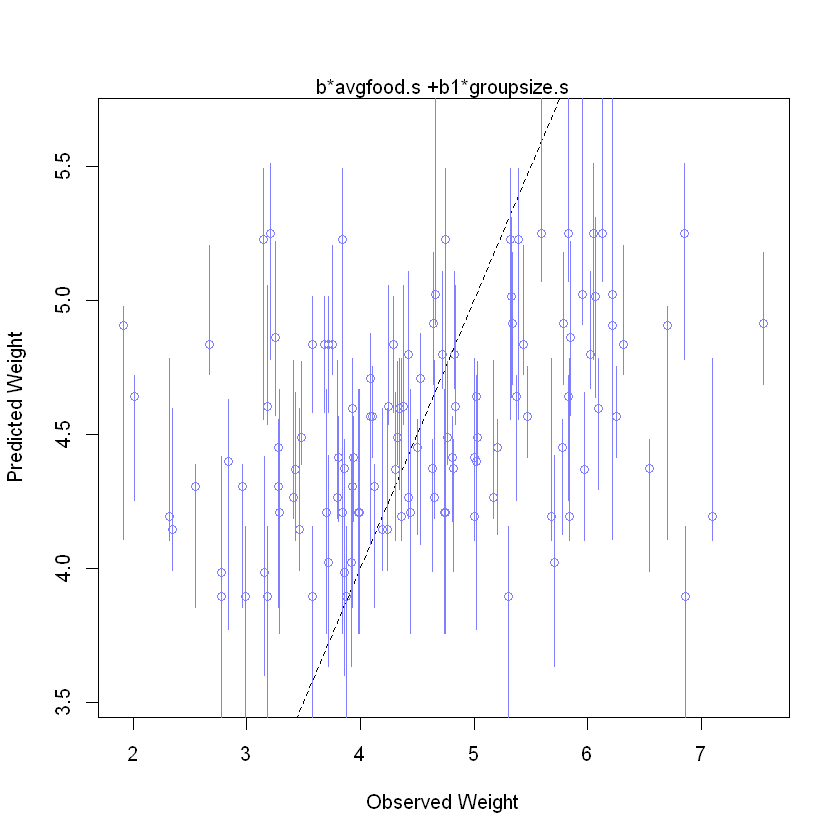

In [154]:
plot( mu.mean2 ~ Fx$weight , col=rangi2 , ylim=range(mu.PI2) , xlab="Observed Weight" , ylab="Predicted Weight" )
abline( a=0 , b=1 , lty=2 )
mtext('b*avgfood.s +b1*groupsize.s')
for ( i in 1:nrow(Fx) ) 
    lines( rep(Fx$weight[i],2) , c(mu.PI[1,i],mu.PI[2,i]) ,
          col=rangi2 )

In [155]:
precis(MM.5.7.2)

       Mean StdDev  5.5% 94.5%
a      4.53   0.10  4.37  4.69
sigma  1.10   0.07  0.99  1.22
b      0.50   0.29  0.04  0.96
b1    -0.93   0.24 -1.32 -0.55
b2     0.36   0.22  0.00  0.71

In [156]:
precis(MM.5.7)

       Mean StdDev  5.5% 94.5%
a      4.53   0.10  4.36  4.70
sigma  1.12   0.07  1.00  1.23
b      0.76   0.24  0.37  1.14
b1    -0.87   0.24 -1.26 -0.49

In [157]:
precis(MM.5.7.2.1)

       Mean StdDev  5.5% 94.5%
a      4.53   0.10  4.36  4.70
sigma  1.12   0.07  1.00  1.24
b1    -0.67   0.19 -0.96 -0.37
b2     0.57   0.19  0.28  0.87

In [158]:
#bodyweight as an additive function of avgfood and groupsize, and
MM.5.7.2.1 <- map( 
    alist( 
        weight ~ dnorm( mu , sigma ),
        mu <- a + b1*groupsize.s + b2*area.s,
        a ~ dnorm( 4 , 100 ) ,
        #b ~ dnorm( 0 , 10 ) , 
        b1 ~ dnorm( 0 , 10 ) , 
        b2 ~ dnorm( 0 , 10 ) , 
        sigma ~ dunif( 0 , 50 ) ) ,
    data=Fx , start=list( a=mean(Fx$weight) , sigma=sd(Fx$weight) ,b1=0,b2=0) )

[ 1000 / 1000 ]
[ 10000 / 10000 ]


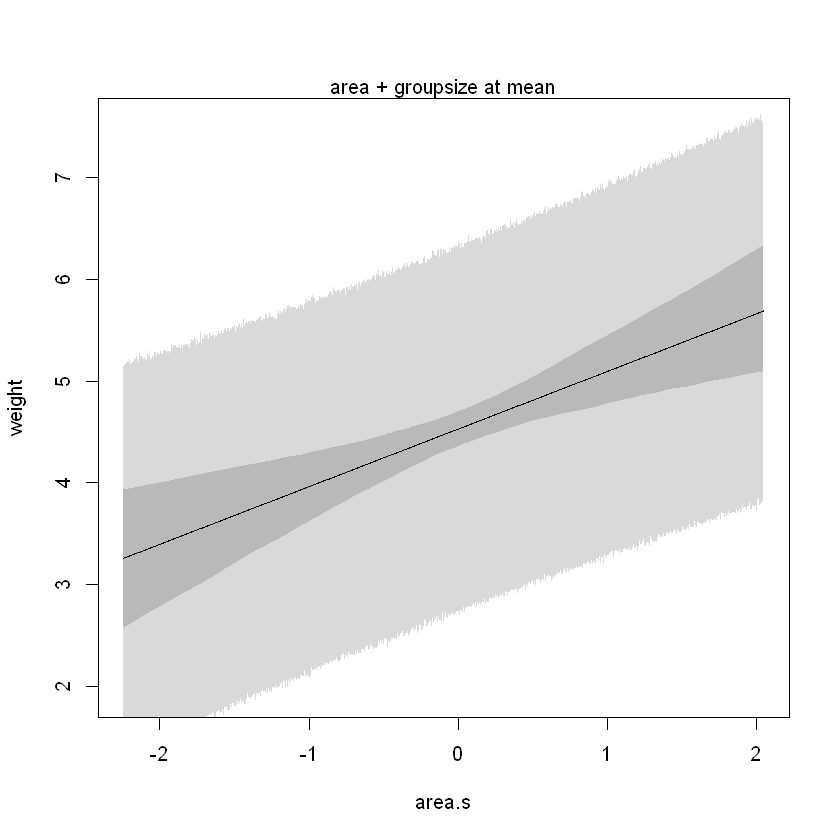

In [159]:
area.seq<-seq(from=min(Fx$area.s),to=max(Fx$area.s), length.out=1e3)
#Draw parameter samples from posterior. There's variance/uncertainty in mu.
mu.multi2.AreaSize <- link( MM.5.7.2.1 , data=data.frame(area.s=area.seq , groupsize.s=mean(Fx$groupsize.s)) )
#Draw Prediction Simulations from psterior. There's variance/uncertainty in prediction/outcome.
sim.weight.Multi.AreaSize <- sim( MM.5.7.2.1 ,
                                data.frame(area.s=area.seq , groupsize.s=mean(Fx$groupsize.s)),
                                n=1e4 )

#Multi2.pi.AREASize <- apply(sim.weight.Multi.AreaSize , 2 , PI)
#display
plot(weight~area.s, Fx , type="n")
mtext("area + groupsize at mean")
lines(area.seq , apply(mu.multi2.AreaSize, 2, mean))
shade(apply( mu.multi2.AreaSize , 2, PI) , area.seq  )
shade(apply( sim.weight.Multi.AreaSize , 2, PI) , area.seq  )

In [160]:
#predict/simulate observations
weight.sim4.AreaSize <- sim(MM.5.7.2.1, n= 1e4)
weight.PI4.AreaSize <-apply(weight.sim4.AreaSize, 2, mean)

[ 10000 / 10000 ]


In [161]:
sum(abs(Fx$weight - weight.PI4.AreaSize))/length(Fx$weight)

[1] 0.8917558

In [162]:
sum((Fx$weight - weight.PI4.AreaSize)**2)/length(Fx$weight)

[1] 1.251968

In [163]:
#draw parameter samples from posterior using trained data
mu.from.source4 <- link(MM.5.7.2.1)

#summarize samples across cases
mu.mean4 <- apply( mu.from.source4, 2 , mean)
mu.PI4 <- apply(mu.from.source4, 2, PI)

#predict/simulate observations
# weight.sim4 <- sim(MM.5.7.2, n= 1e4)
# weight.PI4 <-apply(weight.sim4, 2, PI)

[ 1000 / 1000 ]


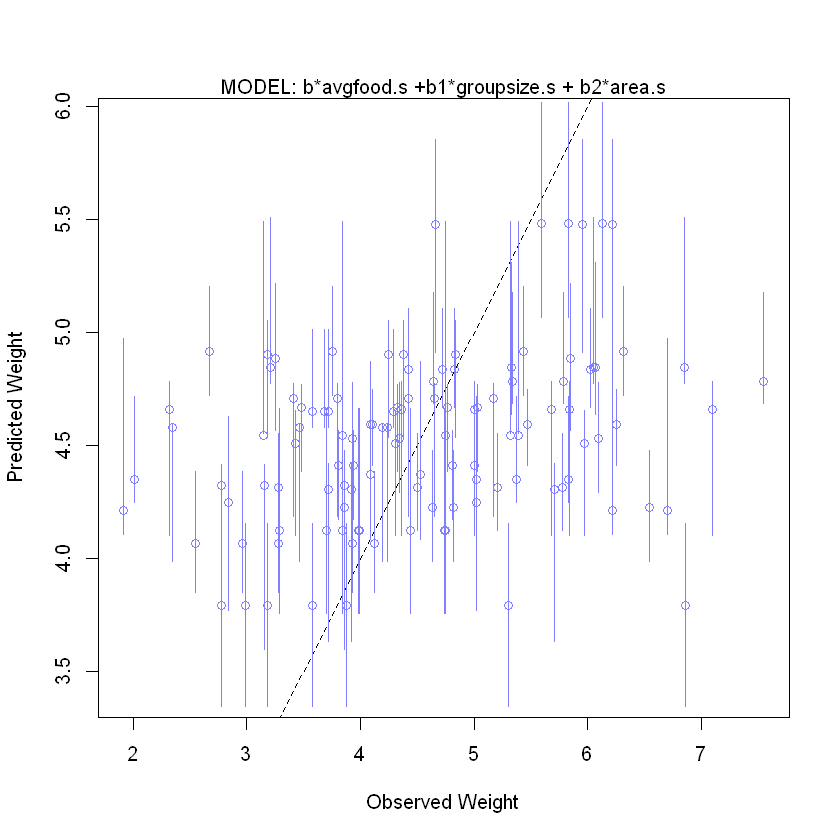

In [164]:
plot( mu.mean4 ~ Fx$weight , col=rangi2 , ylim=range(mu.PI4) , xlab="Observed Weight" , ylab="Predicted Weight" )
abline( a=0 , b=1 , lty=2 )
mtext("MODEL: b*avgfood.s +b1*groupsize.s + b2*area.s")
for ( i in 1:nrow(Fx) ) 
    lines( rep(Fx$weight[i],2) , c(mu.PI[1,i],mu.PI[2,i]) ,
          col=rangi2 )

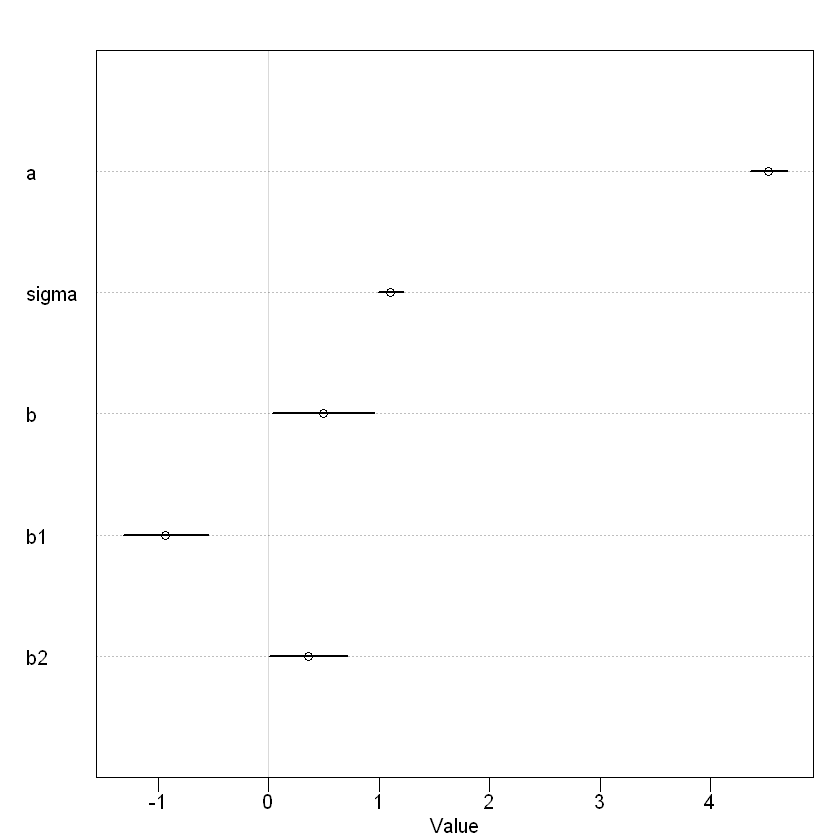

In [165]:
plot(precis(MM.5.7.2))

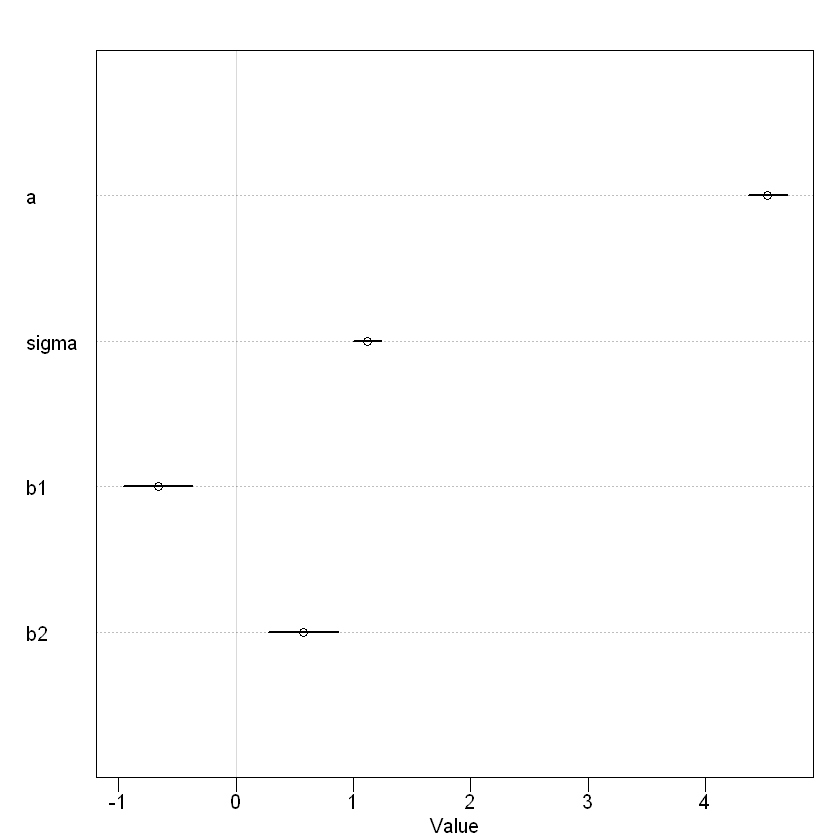

In [166]:
plot(precis(MM.5.7.2.1))

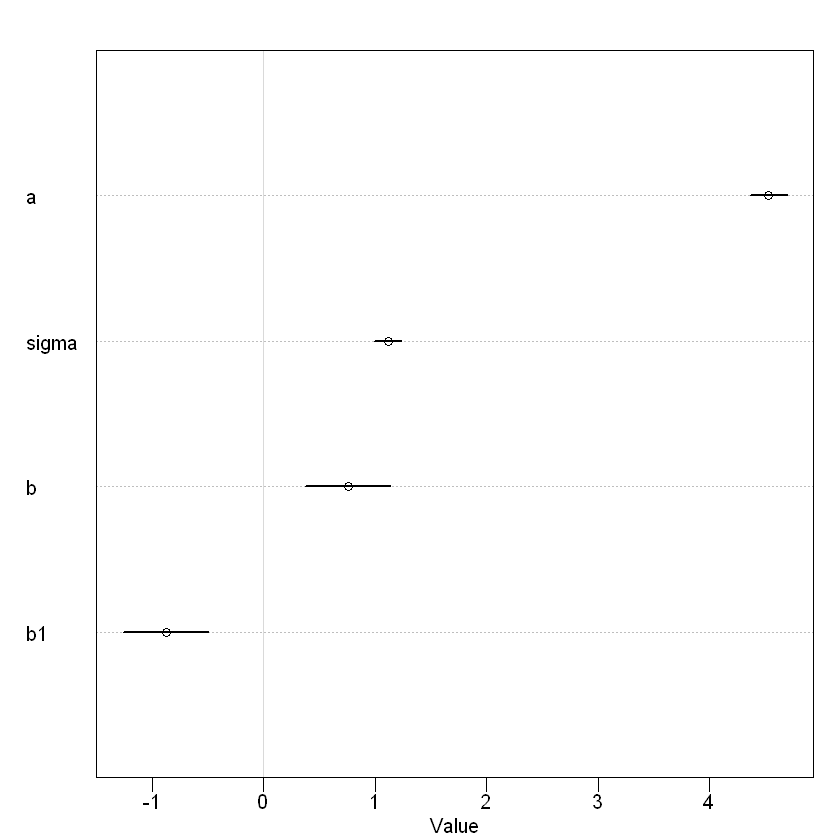

In [167]:
plot(precis(MM.5.7))

In [172]:
precis(MM.5.7,corr = TRUE)

       Mean StdDev  5.5% 94.5% a sigma    b   b1
a      4.53   0.10  4.36  4.70 1     0  0.0  0.0
sigma  1.12   0.07  1.00  1.23 0     1  0.0  0.0
b      0.76   0.24  0.37  1.14 0     0  1.0 -0.9
b1    -0.87   0.24 -1.26 -0.49 0     0 -0.9  1.0

In [169]:
precis(MM.5.7.2.1,corr = TRUE)

       Mean StdDev  5.5% 94.5% a sigma    b1    b2
a      4.53   0.10  4.36  4.70 1     0  0.00  0.00
sigma  1.12   0.07  1.00  1.24 0     1  0.00  0.00
b1    -0.67   0.19 -0.96 -0.37 0     0  1.00 -0.83
b2     0.57   0.19  0.28  0.87 0     0 -0.83  1.00

In [170]:
precis(MM.5.7.2,corr = TRUE)

       Mean StdDev  5.5% 94.5% a sigma     b    b1    b2
a      4.53   0.10  4.37  4.69 1     0  0.00  0.00  0.00
sigma  1.10   0.07  0.99  1.22 0     1  0.00  0.00  0.00
b      0.50   0.29  0.04  0.96 0     0  1.00 -0.65 -0.56
b1    -0.93   0.24 -1.32 -0.55 0     0 -0.65  1.00 -0.16
b2     0.36   0.22  0.00  0.71 0     0 -0.56 -0.16  1.00

# Model Evaluation using topics from Chapter 6

In [225]:
compare(MM.5.7,MM.5.7.2,MM.5.7.2.1)
# MM.5.7.2    avgfood.s , groupsize.s , area.s
# MM.5.7.2.1              groupsize.s , area.s
# MM.5.7      avgfood.s , groupsize.s

            WAIC pWAIC dWAIC weight    SE  dSE
MM.5.7.2   362.8   5.3   0.0   0.40 16.66   NA
MM.5.7.2.1 363.3   3.9   0.5   0.32 15.90 4.18
MM.5.7     363.6   4.3   0.7   0.28 16.82 3.82

In [194]:
MM.5.7.2


Maximum a posteriori (MAP) model fit

Formula:
weight ~ dnorm(mu, sigma)
mu <- a + b * avgfood.s + b1 * groupsize.s + b2 * area.s
a ~ dnorm(4, 100)
b ~ dnorm(0, 10)
b1 ~ dnorm(0, 10)
b2 ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
         a      sigma          b         b1         b2 
 4.5296546  1.1043481  0.4968569 -0.9342001  0.3573862 

Log-likelihood: -176.11 

In [175]:
comp.models <- compare(MM.5.7,MM.5.7.2,MM.5.7.2.1)

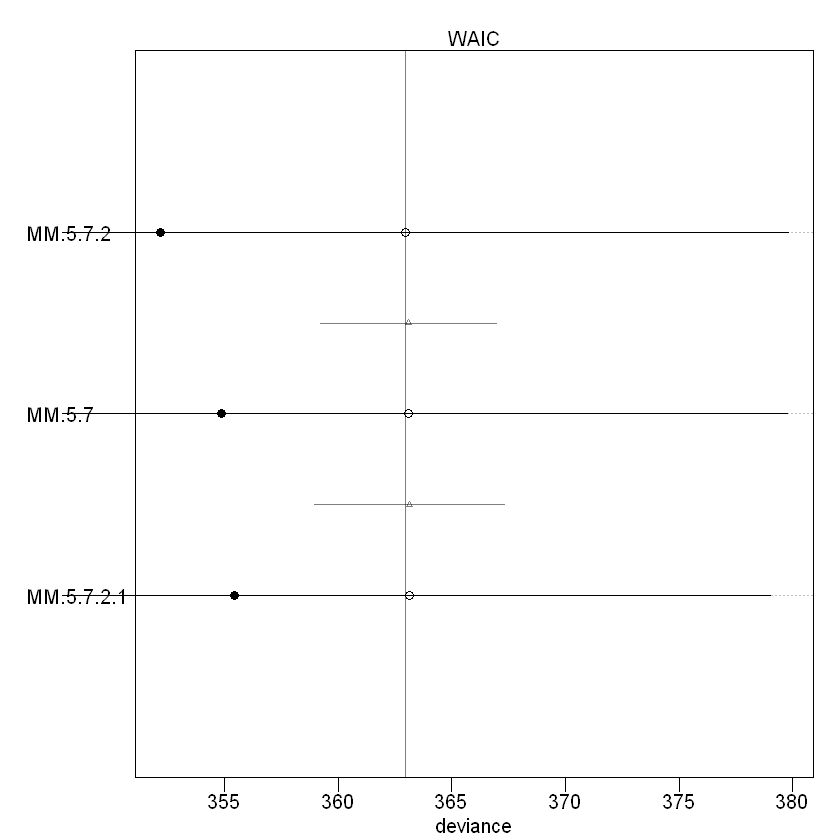

In [177]:
plot(comp.models, SE=TRUE, dSE=TRUE)

In [178]:
coeftab(MM.5.7,MM.5.7.2,MM.5.7.2.1)

      MM.5.7  MM.5.7.2 MM.5.7.2.1
a        4.53    4.53     4.53   
sigma    1.12    1.10     1.12   
b        0.76    0.50       NA   
b1      -0.87   -0.93    -0.67   
b2         NA    0.36     0.57   
nobs      116     116      116   

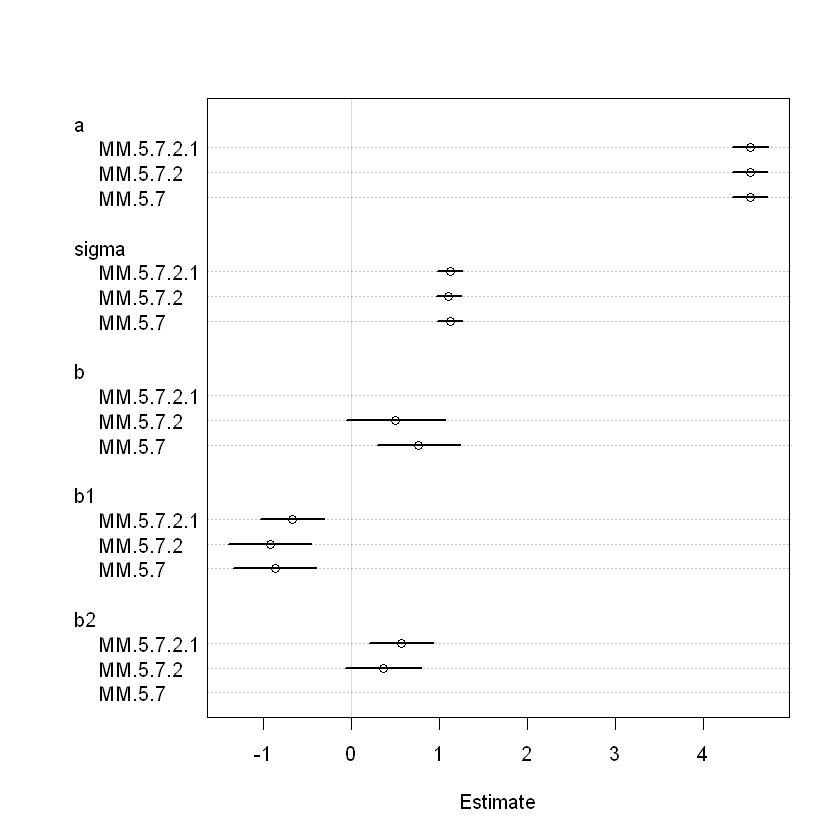

In [179]:
plot(coeftab(MM.5.7,MM.5.7.2,MM.5.7.2.1))

In [ ]:
models.ensemble <- ensemble(MM.5.7,MM.5.7.2,MM.5.7.2.1)

In [180]:
MM.5.7.2


Maximum a posteriori (MAP) model fit

Formula:
weight ~ dnorm(mu, sigma)
mu <- a + b * avgfood.s + b1 * groupsize.s + b2 * area.s
a ~ dnorm(4, 100)
b ~ dnorm(0, 10)
b1 ~ dnorm(0, 10)
b2 ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
         a      sigma          b         b1         b2 
 4.5296546  1.1043481  0.4968569 -0.9342001  0.3573862 

Log-likelihood: -176.11 

[ 1000 / 1000 ]


Constructing posterior predictions


[ 1000 / 1000 ]


Constructing posterior predictions


[ 1000 / 1000 ]


Constructing posterior predictions


[ 1000 / 1000 ]


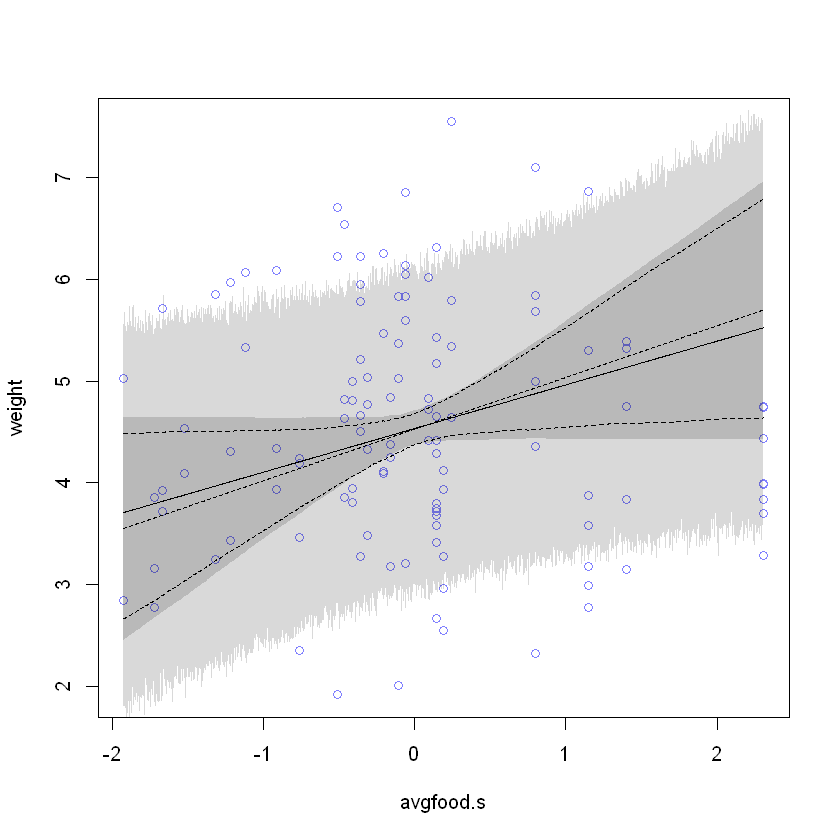

In [217]:
## R code 6.29
# compute counterfactual predictions
# neocortex from 0.5 to 0.8
#nc.seq <- seq(from=0.5,to=0.8,length.out=30)
avgfood.seq<-seq(from=min(Fx$avgfood.s),to=max(Fx$avgfood.s), length.out=1e3)
d.predict <- list(
    weight = rep(0,1e3), # empty outcome
    avgfood.s = avgfood.seq,     # sequence of neocortex
    groupsize.s=rep(mean(Fx$groupsize.s),1e3),
    area.s = rep(mean(Fx$area.s),1e3)
#    mass = rep(4.5,30)      # average mass
)
pred.m6.14 <- link( MM.5.7.2 , data=d.predict )
mu <- apply( pred.m6.14 , 2 , mean )
mu.PI <- apply( pred.m6.14 , 2 , PI )

# plot it all
plot( weight ~ avgfood.s , Fx , col=rangi2 )
lines( avgfood.seq , mu , lty=2 )
lines( avgfood.seq , mu.PI[1,] , lty=2 )
lines( avgfood.seq , mu.PI[2,] , lty=2 )

models.ensemble1 <- ensemble( MM.5.7,MM.5.7.2,MM.5.7.2.1 , data=d.predict )
mu <- apply( models.ensemble1$link , 2 , mean )
mu.PI <- apply( models.ensemble1$link , 2 , PI )
sim.pi <- apply( models.ensemble1$sim , 2 , PI )

lines( avgfood.seq , mu )
shade( mu.PI , avgfood.seq )
shade( sim.pi , avgfood.seq )

[ 1000 / 1000 ]


Constructing posterior predictions


[ 1000 / 1000 ]


Constructing posterior predictions


[ 1000 / 1000 ]


Constructing posterior predictions


[ 1000 / 1000 ]


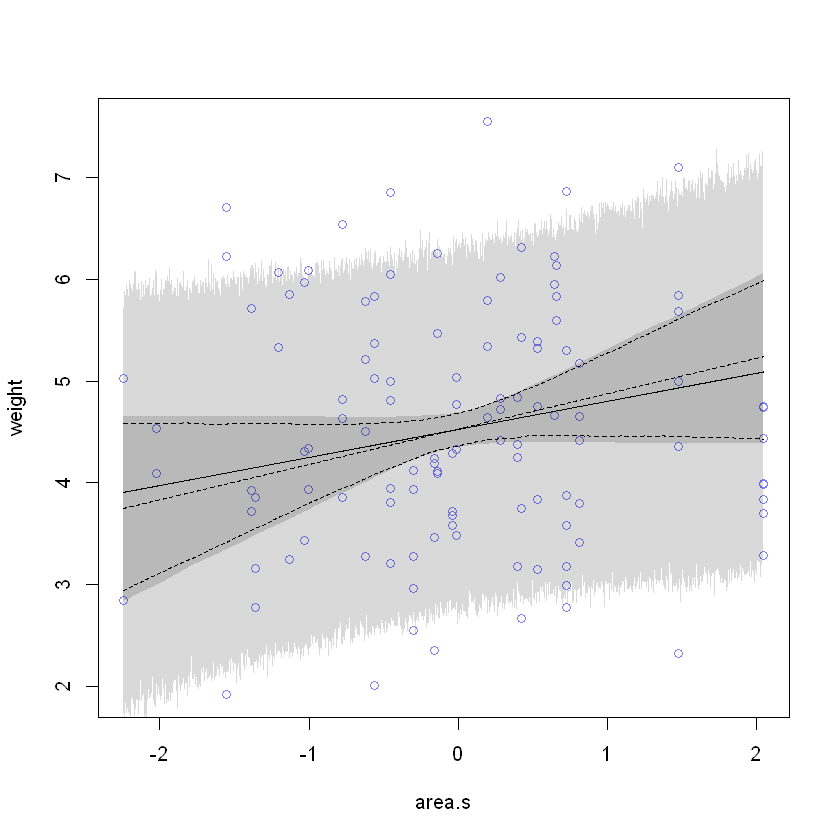

In [221]:
## R code 6.29
# compute counterfactual predictions
# neocortex from 0.5 to 0.8
#nc.seq <- seq(from=0.5,to=0.8,length.out=30)
area.seq<-seq(from=min(Fx$area.s),to=max(Fx$area.s), length.out=1e3)
d.predict <- list(
    weight = rep(0,1e3), # empty outcome
    avgfood.s = rep(mean(Fx$avgfood.s),1e3),     # sequence of neocortex
    groupsize.s=rep(mean(Fx$groupsize.s),1e3),
    area.s = area.seq #rep(mean(Fx$area.s),1e3)
#    mass = rep(4.5,30)      # average mass
)
pred.m6.14 <- link( MM.5.7.2 , data=d.predict )
mu <- apply( pred.m6.14 , 2 , mean )
mu.PI <- apply( pred.m6.14 , 2 , PI )

# plot it all
plot( weight ~ area.s , Fx , col=rangi2 )
lines( area.seq , mu , lty=2 )
lines( area.seq , mu.PI[1,] , lty=2 )
lines( area.seq , mu.PI[2,] , lty=2 )

models.ensemble1 <- ensemble( MM.5.7,MM.5.7.2,MM.5.7.2.1 , data=d.predict )
mu <- apply( models.ensemble1$link , 2 , mean )
mu.PI <- apply( models.ensemble1$link , 2 , PI )
sim.pi <- apply( models.ensemble1$sim , 2 , PI )

lines( area.seq , mu )
shade( mu.PI , area.seq )
shade( sim.pi , area.seq )

# Conclusion

Based on Compare() they're all terrible but the model with all 3 variables is the best.
<p>Followed by the groupsize & area model (MM.5.7.2.1)
<p>Feature selection: Groupsize better of the 3 and avg and area both terrible but are better than groupsize alone.

In [237]:
#Based on compare they all suck but the model with all 3 is the best.
#Groupsize better of the 3 and avg and area both terrible
compare(MM.5.7,MM.5.7.2,MM.5.7.2.1)
# MM.5.7.2    avgfood.s , groupsize.s , area.s
# MM.5.7.2.1              groupsize.s , area.s
# MM.5.7      avgfood.s , groupsize.s

            WAIC pWAIC dWAIC weight    SE  dSE
MM.5.7.2   363.2   5.5   0.0   0.36 16.75   NA
MM.5.7.2.1 363.3   4.0   0.1   0.34 16.00 4.18
MM.5.7     363.5   4.3   0.3   0.30 16.61 3.84